In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from utils_shear_ana import catutil

# Calculate average multiplicative bias and shear response

In [14]:
data_z1 = []
data_dir = os.environ.get("HSCY3_DATADIR", "/hildafs/datasets/shared_phy200017p/HSC_shape_catalog_Y3/catalog_obs_reGaus_public")
for fieldname in ["XMM", "VVDS", "HECTOMAP", "GAMA09H", "WIDE12H", "GAMA15H"]:
    file_name = os.path.join(data_dir, "%s.fits" % fieldname)
    data = pyfits.getdata(file_name)
    sel = (data["hsc_y3_zbin"] ==1) & (data["b_mode_mask"])
    data_z1.append(data[sel])
data_z1 = np.hstack(data_z1)
wsum = np.sum(data_z1['i_hsmshaperegauss_derived_weight'])

In [15]:
# Multiplicative bias
mbias = np.sum(
    data_z1['i_hsmshaperegauss_derived_shear_bias_m']
    * data_z1['i_hsmshaperegauss_derived_weight']
) / wsum

# Regauss Shear response
response = 1 - np.sum(
    data_z1['i_hsmshaperegauss_derived_rms_e']**2.0
    * data_z1['i_hsmshaperegauss_derived_weight']
) / wsum

# Selection bias
msel, asel, msel_err, asel_err = catutil.get_sel_bias(
    data_z1['i_hsmshaperegauss_derived_weight'],
    data_z1['i_apertureflux_10_mag'],
    data_z1['i_hsmshaperegauss_resolution'],
)

# Transfor the shape catalog to shear catalog

In [16]:
# shear
g1, g2 = catutil.get_shear_regauss(data_z1, mbias, msel, asel)
# position
ra, dec = catutil.get_radec(data_z1)
# weight
weight = catutil.get_shape_weight_regauss(data_z1)

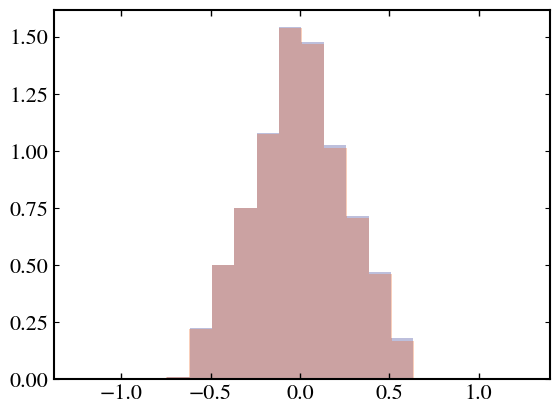

In [23]:
plt.hist(g1, bins=20, density=True, alpha=0.3);
plt.hist(g2, bins=20, density=True, alpha=0.3);